In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df_bbq = pd.read_csv('https://raw.githubusercontent.com/hyyga/Deep-Learning-GSLC-1-/refs/heads/main/weather_prediction_bbq_labels.csv')
df = pd.read_csv('https://raw.githubusercontent.com/hyyga/Deep-Learning-GSLC-1-/refs/heads/main/weather_prediction_dataset.csv')

In [44]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  

[5 rows x 165 columns]

In [45]:
df_bbq.head()

DATE  BASEL_BBQ_weather  BUDAPEST_BBQ_weather  DE_BBQ_weather  \
0  20000101              False                 False           False   
1  20000102              False                 False           False   
2  20000103              False                 False           False   
3  20000104              False                 False           False   
4  20000105              False                 False           False   

   DRESDEN_BBQ_weather  DUSSELDORF_BBQ_weather  HEATHROW_BBQ_weather  \
0                False                   False                 False   
1                False                   False                 False   
2                False                   False                 False   
3                False                   False                 False   
4                False                   False                 False   

   KASSEL_BBQ_weather  LJUBLJANA_BBQ_weather  MAASTRICHT_BBQ_weather  \
0               False                  False                   False   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4               False                  False                   False   

   MALMO_BBQ_weather  MONTELIMAR_BBQ_weather  MUENCHEN_BBQ_weather  \
0              False                   False                 False   
1              False                   False                 False   
2              False                   False                 False   
3              False                   False                 False   
4              False                   False                 False   

   OSLO_BBQ_weather  PERPIGNAN_BBQ_weather  SONNBLICK_BBQ_weather  \
0             False                  False                  False   
1             False                  False                  False   
2             False                  False                  False   
3             False                  False                  False   
4             False                  False                  False   

   STOCKHOLM_BBQ_weather  TOURS_BBQ_weather  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


Dataset ini dibuat oleh ECA&D (European Climate Assessment & Dataset), observasi harian dari stasiun meteorologi di 18 kota eropa, pada observasi ini saya akan fokus pada kota Budapest.

In [47]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

# BUDAPEST

In [48]:
df.columns[11:19]

Index(['BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure',
       'BUDAPEST_global_radiation', 'BUDAPEST_precipitation',
       'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max'],
      dtype='object')

In [49]:
df_budapest = df[['DATE', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity',
                  'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation','BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max']]

In [50]:
df_budapest['BBQ'] = df_bbq['BUDAPEST_BBQ_weather']

/tmp/ipython-input-1622001507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budapest['BBQ'] = df_bbq['BUDAPEST_BBQ_weather']


In [51]:
df_budapest.head()

DATE  BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0  20000101                     3               0.92             1.0268   
1  20000102                     8               0.94             1.0297   
2  20000103                     6               0.95             1.0295   
3  20000104                     8               0.94             1.0252   
4  20000105                     5               0.88             1.0235   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.52                     0.0                3.7   
1                       0.14                     0.0                0.4   
2                       0.19                     0.0                0.0   
3                       0.21                     0.0                0.0   
4                       0.43                     0.0                0.8   

   BUDAPEST_temp_mean  BUDAPEST_temp_max    BBQ  
0                -4.9               -0.7  False  
1                -3.6               -1.9  False  
2                -0.8                1.1  False  
3                -1.0                0.1  False  
4                 0.2                3.9  False

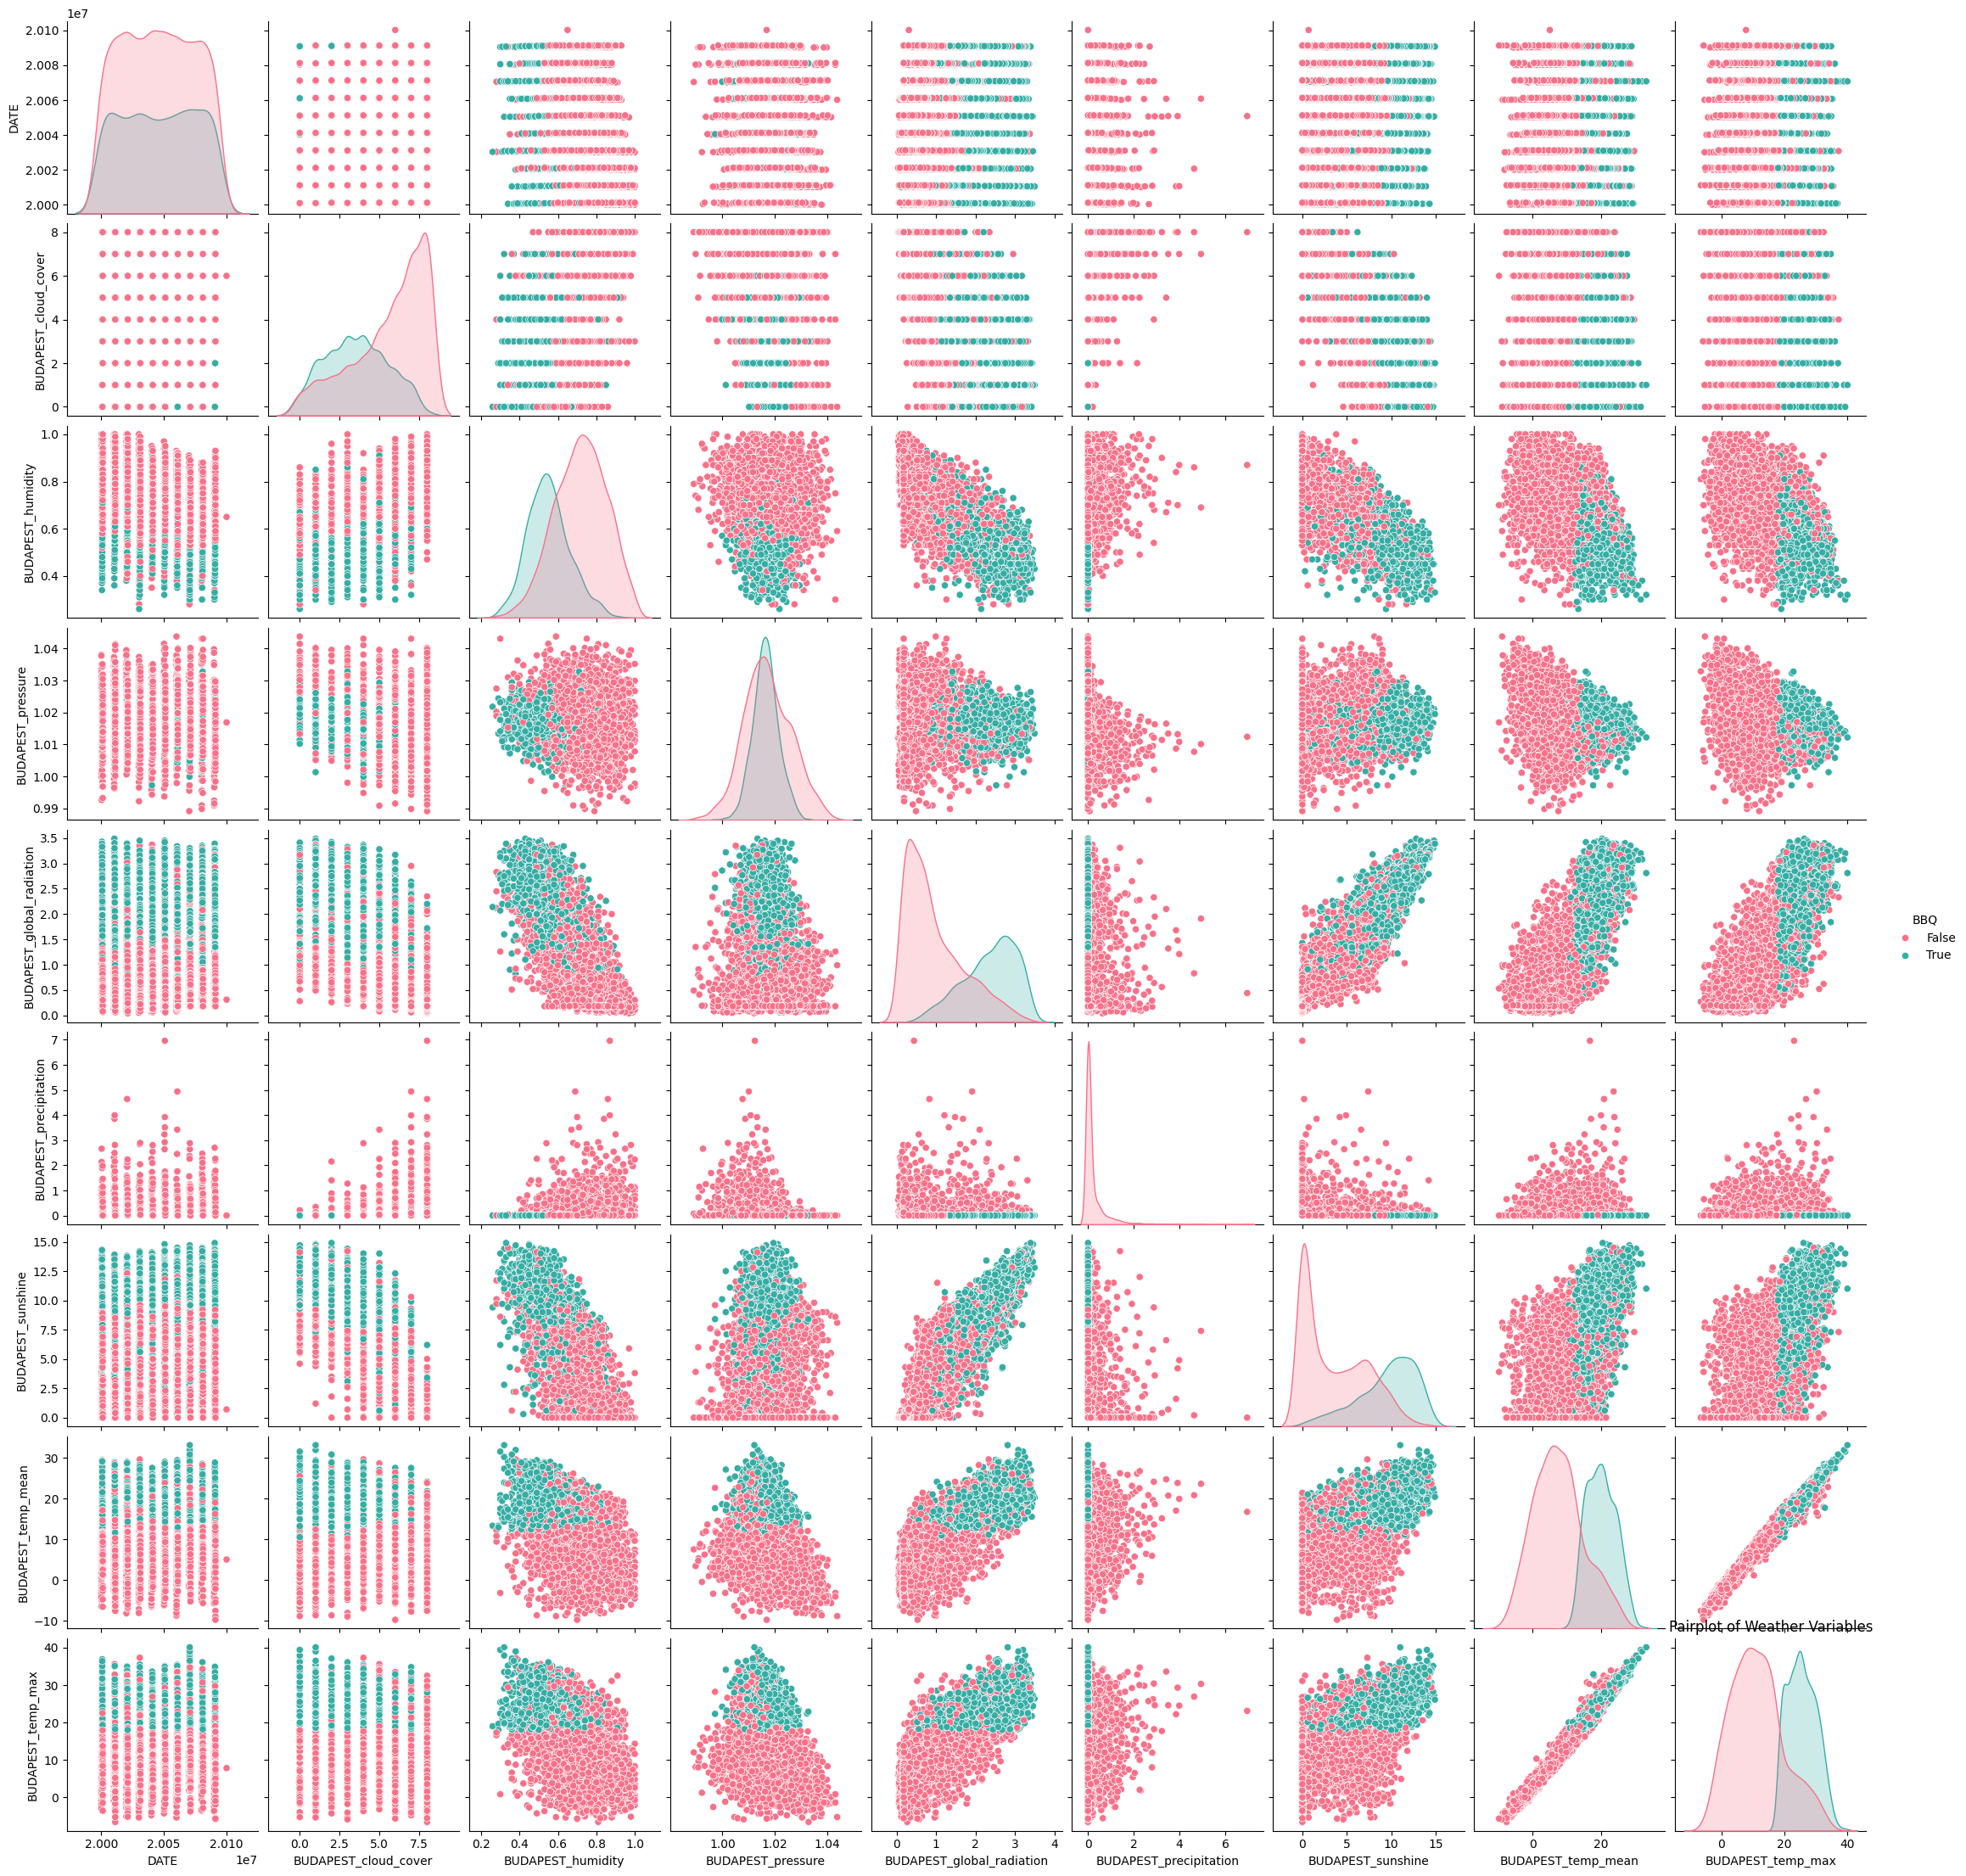

In [52]:
sns.pairplot(df_budapest, hue='BBQ', palette='husl')
plt.title('Pairplot of Weather Variables')
plt.show()

plot ini digunakan untuk hubungan antar variabel cuaca, dan membandingkan hubungan itu berdasarkan label BBQ (apakah hari itu cocok untuk BBQ atau tidak)

merah = 0 -> hari cocok BBQ
hijau = 1 -> hari tidak cocok BBQ

contohnya:
temperature (temp_mean, temp_max)
wanra biru (true) banyak di tempreature tinggi
wanah merah (false) banyak di temperature rendah
artinya: hari lebih hangat cenderung cocok untuk BBQ

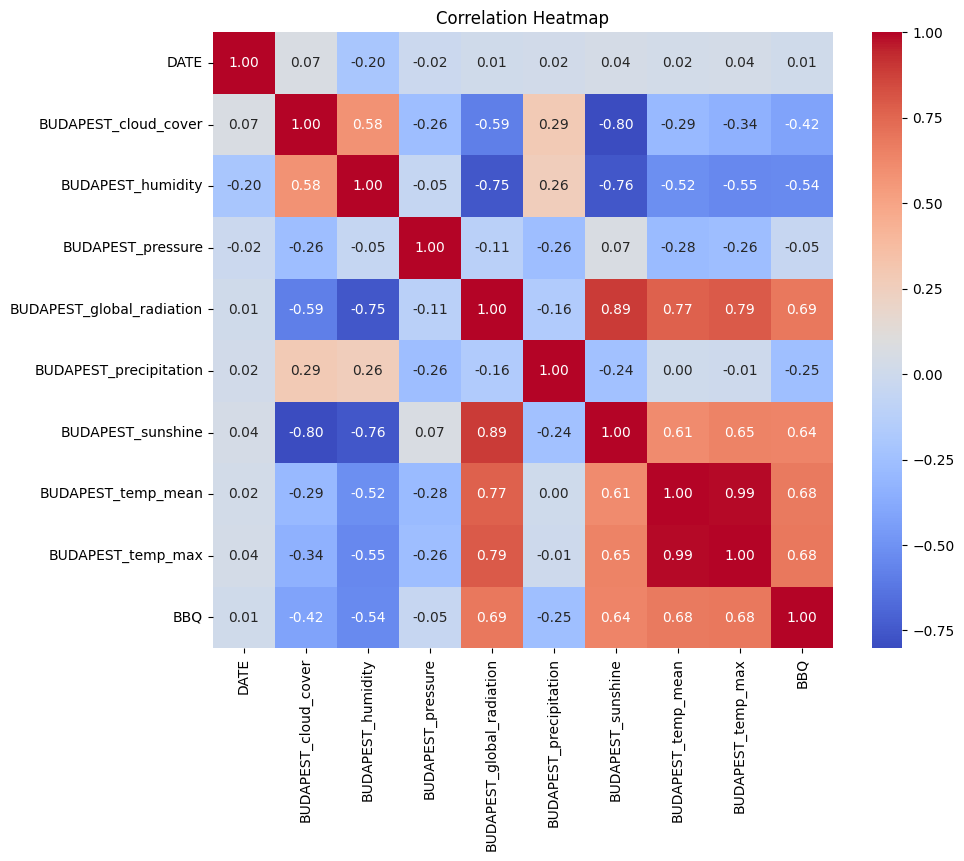

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_budapest.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

visualisasi menunjukan hubungan antar variabel cuaca di budapest dan seberapa besar pengaruhnya terhadap variabel BBQ.

3 korelasi yang paling tinggi

BUDAPEST_temp_mean vs BUDAPEST_global_radiation -> 0.77

BUDAPEST_global_radiation_ vs BUDAPEST_temp_max -> 0.79

BUDAPEST_sunshine vs BUDAPEST_global_Radiation -> 0.89

berdasarkan correlation heatmap, variabel yang paling berpengaruh terhadap kemungkinan hari cocok untuk BBQ adalah global radiation, temperature (mean dan max), dan sunshine, semuanya menunjukan korelasi positif kuat.
sebaliknya, humidity dan cloud cover memiliki korelasi negatif, menunjukan bahwa kondisi lembap dan mendung cenderung tidak ideal untuk BBQ. secara keseluruhan haari yang hangat, kering dan cerah merupakan indikator utama hari yang cocok untuk BBQ di Budapest

/tmp/ipython-input-207015962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_budapest, x='BBQ', palette='Set2')


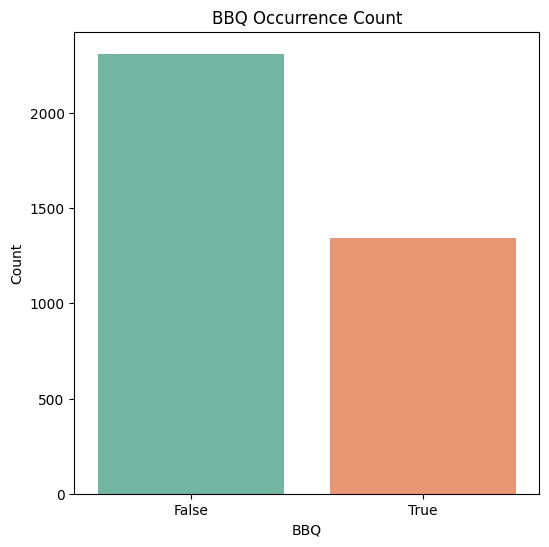

In [54]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_budapest, x='BBQ', palette='Set2')
plt.title('BBQ Occurrence Count')
plt.xlabel('BBQ')
plt.ylabel('Count')
plt.show()

grafik ini menampilkan jumlah data dari kolom bbq

ada lebih banyak hari tanpa adanya BBQ

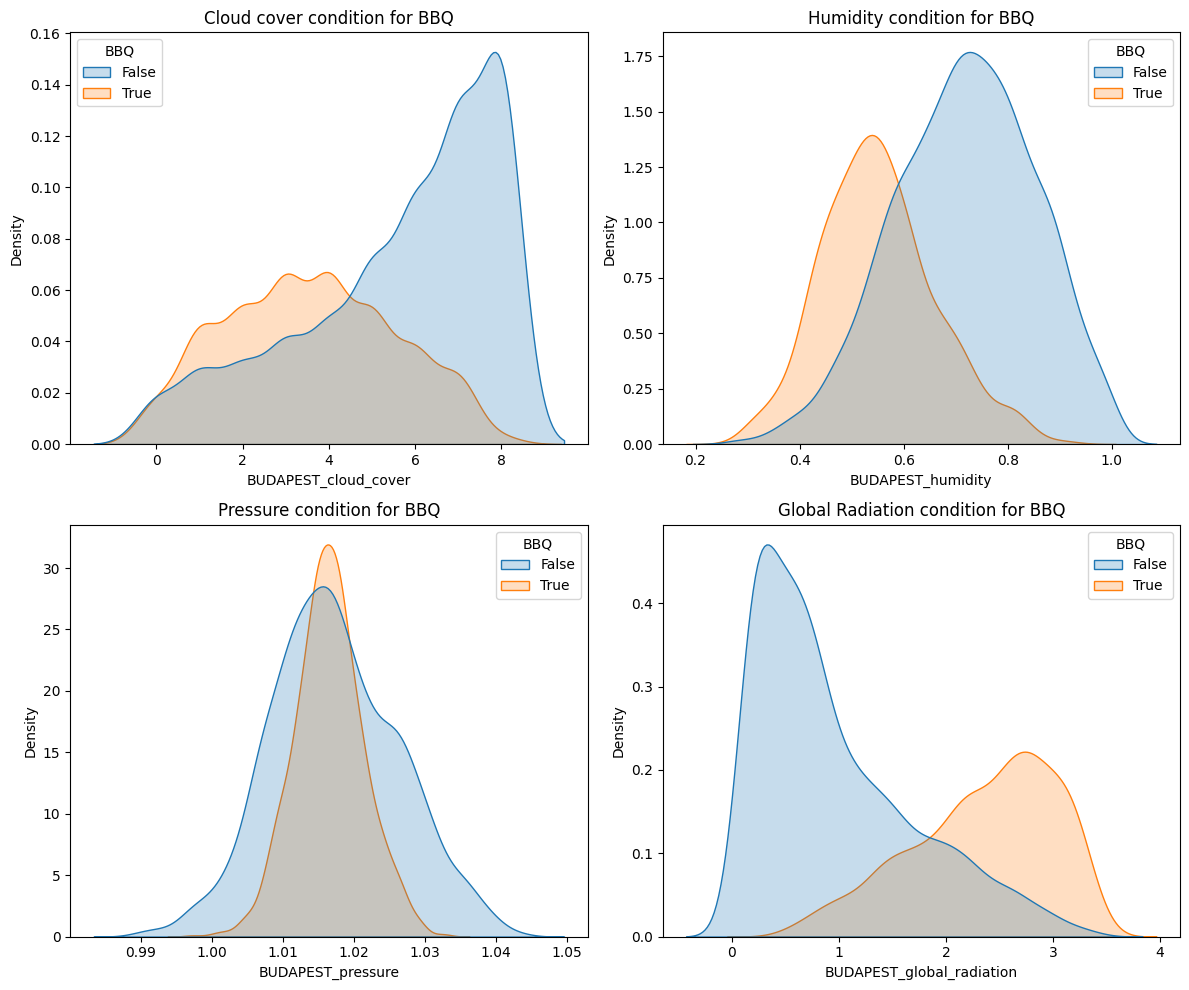

In [55]:
fig, axs = plt.subplots(2,2, figsize=(12,10))

sns.kdeplot(data=df_budapest, x='BUDAPEST_cloud_cover', hue='BBQ', fill=True, ax=axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')

sns.kdeplot(data=df_budapest, x='BUDAPEST_humidity', hue='BBQ', fill=True, ax=axs[0,1])
axs[0,1].set_title('Humidity condition for BBQ')

sns.kdeplot(data=df_budapest, x='BUDAPEST_pressure', hue='BBQ', fill=True, ax=axs[1,0])
axs[1,0].set_title('Pressure condition for BBQ')

sns.kdeplot(data=df_budapest, x='BUDAPEST_global_radiation', hue='BBQ', fill=True, ax=axs[1,1])
axs[1,1].set_title('Global Radiation condition for BBQ')

plt.tight_layout()
plt.show()


Grafik ini adalah kondisi cuaca untuk acara BBQ.

graf BUDAPEST_cloud_cover (x), Density (y) terlihat bahwa kurva orange lebih tinggi di cloud cover bernilai 2-4, sedangkan kurva biru sekitar 4-8. artinya BBQ lebih sering terjadi jika cuacanya cerah.

BUDAPEST_humandity (x), Density (y). kurva orange berada pada nilai 0.4-0.8, sedangkan kurva biru 0.4-1. artinya BBQ cenderung terlangsungkan ketika cuaca dalam kondisi kelembaban yang sedang.

Sumbu X: BUDAPEST_pressure → tekanan udara (semakin tinggi, cuaca biasanya stabil dan cerah)

👉 Terlihat bahwa:

Distribusi mirip antara dua kurva.

Namun, kurva BBQ (oranye) sedikit condong ke tekanan yang lebih tinggi (sekitar 1.02).

🟩 Kesimpulan:
BBQ sedikit lebih sering dilakukan pada tekanan udara tinggi,
yang menandakan cuaca cerah dan stabil.

Sumbu X: BUDAPEST_global_radiation → intensitas sinar matahari (semakin tinggi, makin cerah/panas)

👉 Terlihat bahwa:

Hari BBQ (oranye) lebih tinggi pada nilai radiasi tinggi (sekitar 2–3.5)

Hari tanpa BBQ (biru) dominan di radiasi rendah (0–1)

🟩 Kesimpulan:
BBQ lebih sering dilakukan saat hari cerah dengan sinar matahari tinggi,
sementara hari mendung atau kurang cahaya jarang digunakan untuk BBQ.

/tmp/ipython-input-1050294499.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_budapest, x='BUDAPEST_precipitation', hue = 'BBQ', fill = True, ax = axs[0,0])


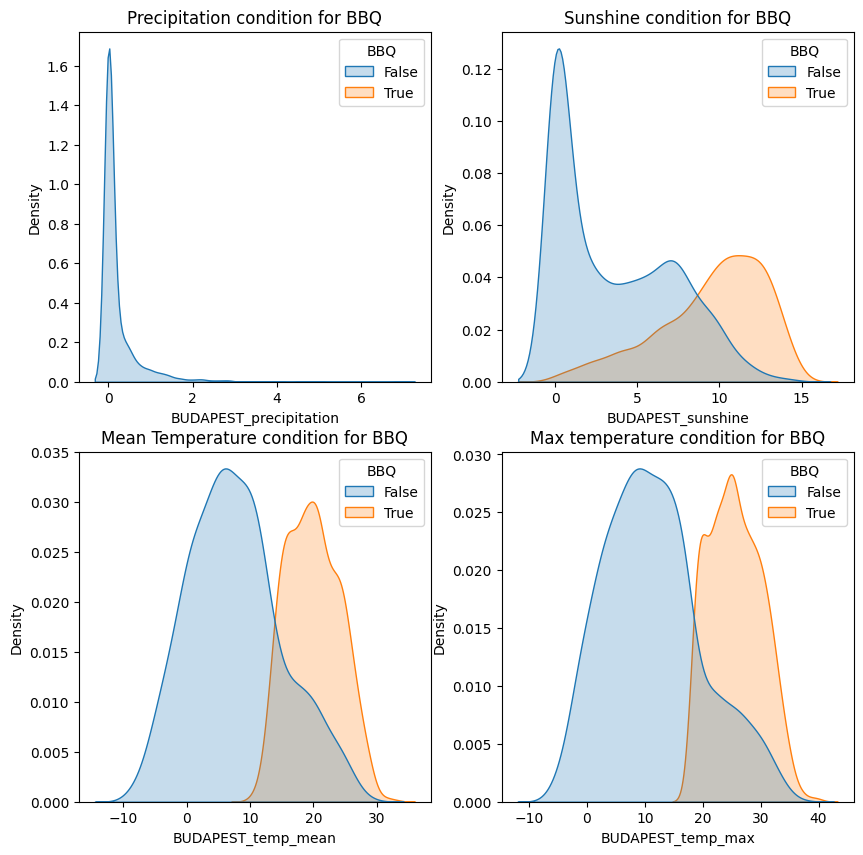

In [56]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_budapest, x='BUDAPEST_precipitation', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Precipitation condition for BBQ')

sns.kdeplot(data = df_budapest, x='BUDAPEST_sunshine', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Sunshine condition for BBQ')

sns.kdeplot(data = df_budapest, x='BUDAPEST_temp_mean', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Mean Temperature condition for BBQ')

sns.kdeplot(data = df_budapest, x='BUDAPEST_temp_max', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Max temperature condition for BBQ')

plt.show()

Grafik ini adalah kondisi cuaca untuk acara BBQ.

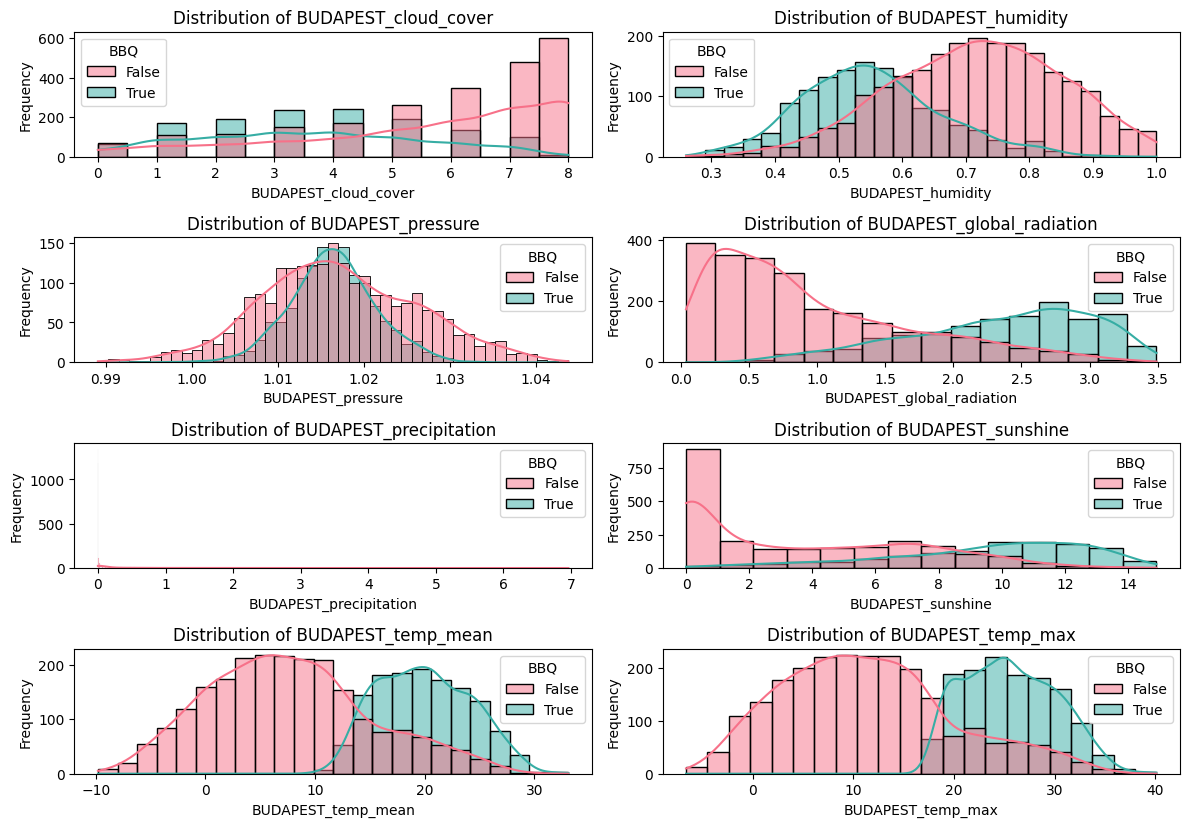

In [57]:
# Distribution plots for weather variables
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

variables = ['BUDAPEST_cloud_cover', 'BUDAPEST_humidity',
             'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation','BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max']

for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df_budapest, x=var, kde=True, hue='BBQ', palette='husl')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff

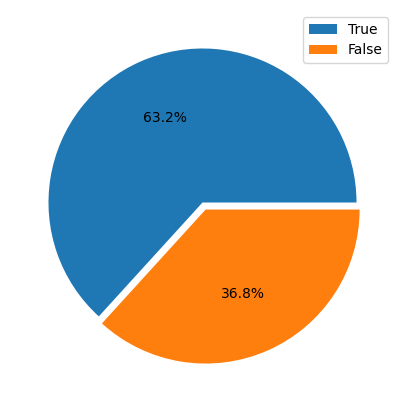

In [58]:
#True vs False: condition for having a nice weather
plt.figure(figsize = (5,5))
explode = [0,0.05]
plt.pie(df_budapest['BBQ'].value_counts(),
        explode=explode, autopct='%.1f%%');
plt.legend(['True', 'False']);
plt.show()

fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff

In [59]:
df_budapest['BBQ'] = df_budapest['BBQ'].map({True:1, False:0});

/tmp/ipython-input-3095628062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budapest['BBQ'] = df_budapest['BBQ'].map({True:1, False:0});


In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# X = semua kolom numerik kecuali DATE dan target BBQ
X = df_budapest.drop(['DATE','BBQ'], axis=1)
y = df_budapest['BBQ']  # 0 = No BBQ, 1 = Yes BBQ

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=28
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=28
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

y_train = to_categorical(y_train, num_classes=2)
y_test  = to_categorical(y_test, num_classes=2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2923, 8) (2923, 2)
(731, 8) (731, 2)


In [74]:
#A very simple ANN model with 2 layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # 2 class BBQ
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8318 - loss: 0.4305 - val_accuracy: 0.9111 - val_loss: 0.2349
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.2322 - val_accuracy: 0.9275 - val_loss: 0.1982
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9291 - loss: 0.2009 - val_accuracy: 0.9248 - val_loss: 0.1802
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9337 - loss: 0.1807 - val_accuracy: 0.9289 - val_loss: 0.1579
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9364 - loss: 0.1787 - val_accuracy: 0.9398 - val_loss: 0.1472
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9420 - loss: 0.1644 - val_accuracy: 0.9480 - val_loss: 0.1307
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9493 - loss: 0.1429 - val_accuracy: 0.9466 - val_loss: 0.1309
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9534 - loss: 0.1252 - val_accuracy: 0.9576 - v

<Axes: >

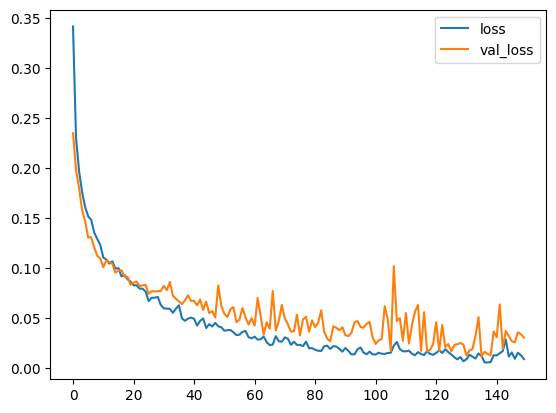

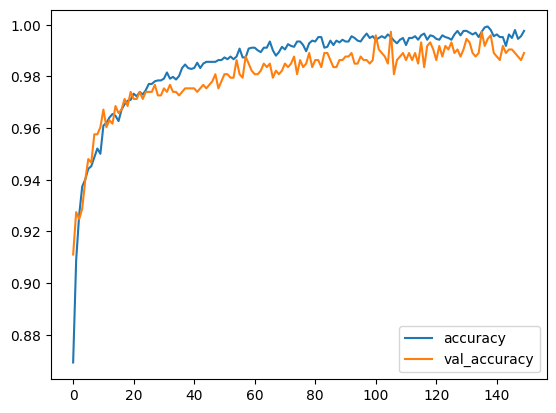

In [76]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

dsffffffffffffffffffffff

In [77]:
predictions = np.round(model.predict(X_test))
print(classification_report(y_test,predictions))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       469
           1       0.97      1.00      0.98       262

   micro avg       0.99      0.99      0.99       731
   macro avg       0.99      0.99      0.99       731
weighted avg       0.99      0.99      0.99       731
 samples avg       0.99      0.99      0.99       731



dddddddddddddddddddd

In [78]:
ann_acc = accuracy_score(y_test, predictions)
ann_acc

0.9890560875512996

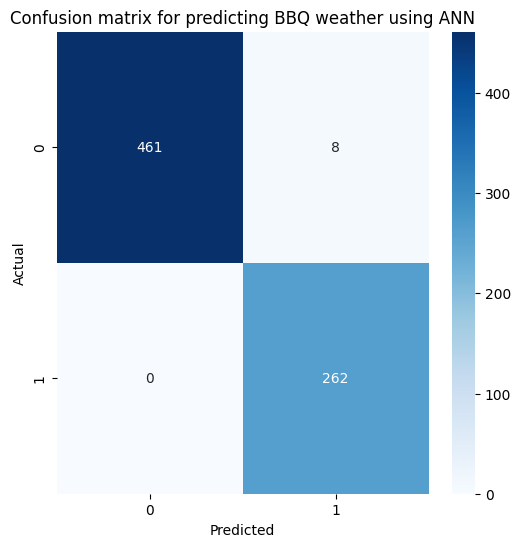

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Jika y_test dan predictions berbentuk one-hot
y_test_labels = np.argmax(y_test, axis=1)
pred_labels   = np.argmax(predictions, axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test_labels, pred_labels), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for predicting BBQ weather using ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ddddddddddddddddddddddddddddddddddd